In [1]:
#import libraries
import pandas as pd
import numpy as np

In [2]:
#load dataset
df=pd.read_csv('Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
# Function to classify as 'Risky' or 'Good'
def classify_risk(row):
   if row['Taxable.Income'] <= 30000:
       return 'Risky'
   else:
       return 'Good'

# Apply the function to create a new column
df['Risk'] = df.apply(classify_risk, axis=1)
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Risk
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [4]:
df['Risk'].value_counts()

Risk
Good     476
Risky    124
Name: count, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Undergrad']=le.fit_transform(df['Undergrad'])
df['Marital.Status']=le.fit_transform(df['Marital.Status'])
df['Urban']=le.fit_transform(df['Urban'])
df['Risk']=le.fit_transform(df['Risk'])
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Risk
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int32
 6   Risk             600 non-null    int32
dtypes: int32(4), int64(3)
memory usage: 23.6 KB


In [7]:
df.describe()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Risk
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,55208.375000,108747.368333,15.558333,0.503333,0.206667
std,0.500017,0.821958,26204.827597,49850.075134,8.842147,0.500406,0.405252
min,0.000000,0.000000,10003.000000,25779.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,32871.500000,66966.750000,8.000000,0.000000,0.000000
50%,1.000000,1.000000,55074.500000,106493.500000,15.000000,1.000000,0.000000
75%,1.000000,2.000000,78611.750000,150114.250000,24.000000,1.000000,0.000000
max,1.000000,2.000000,99619.000000,199778.000000,30.000000,1.000000,1.000000


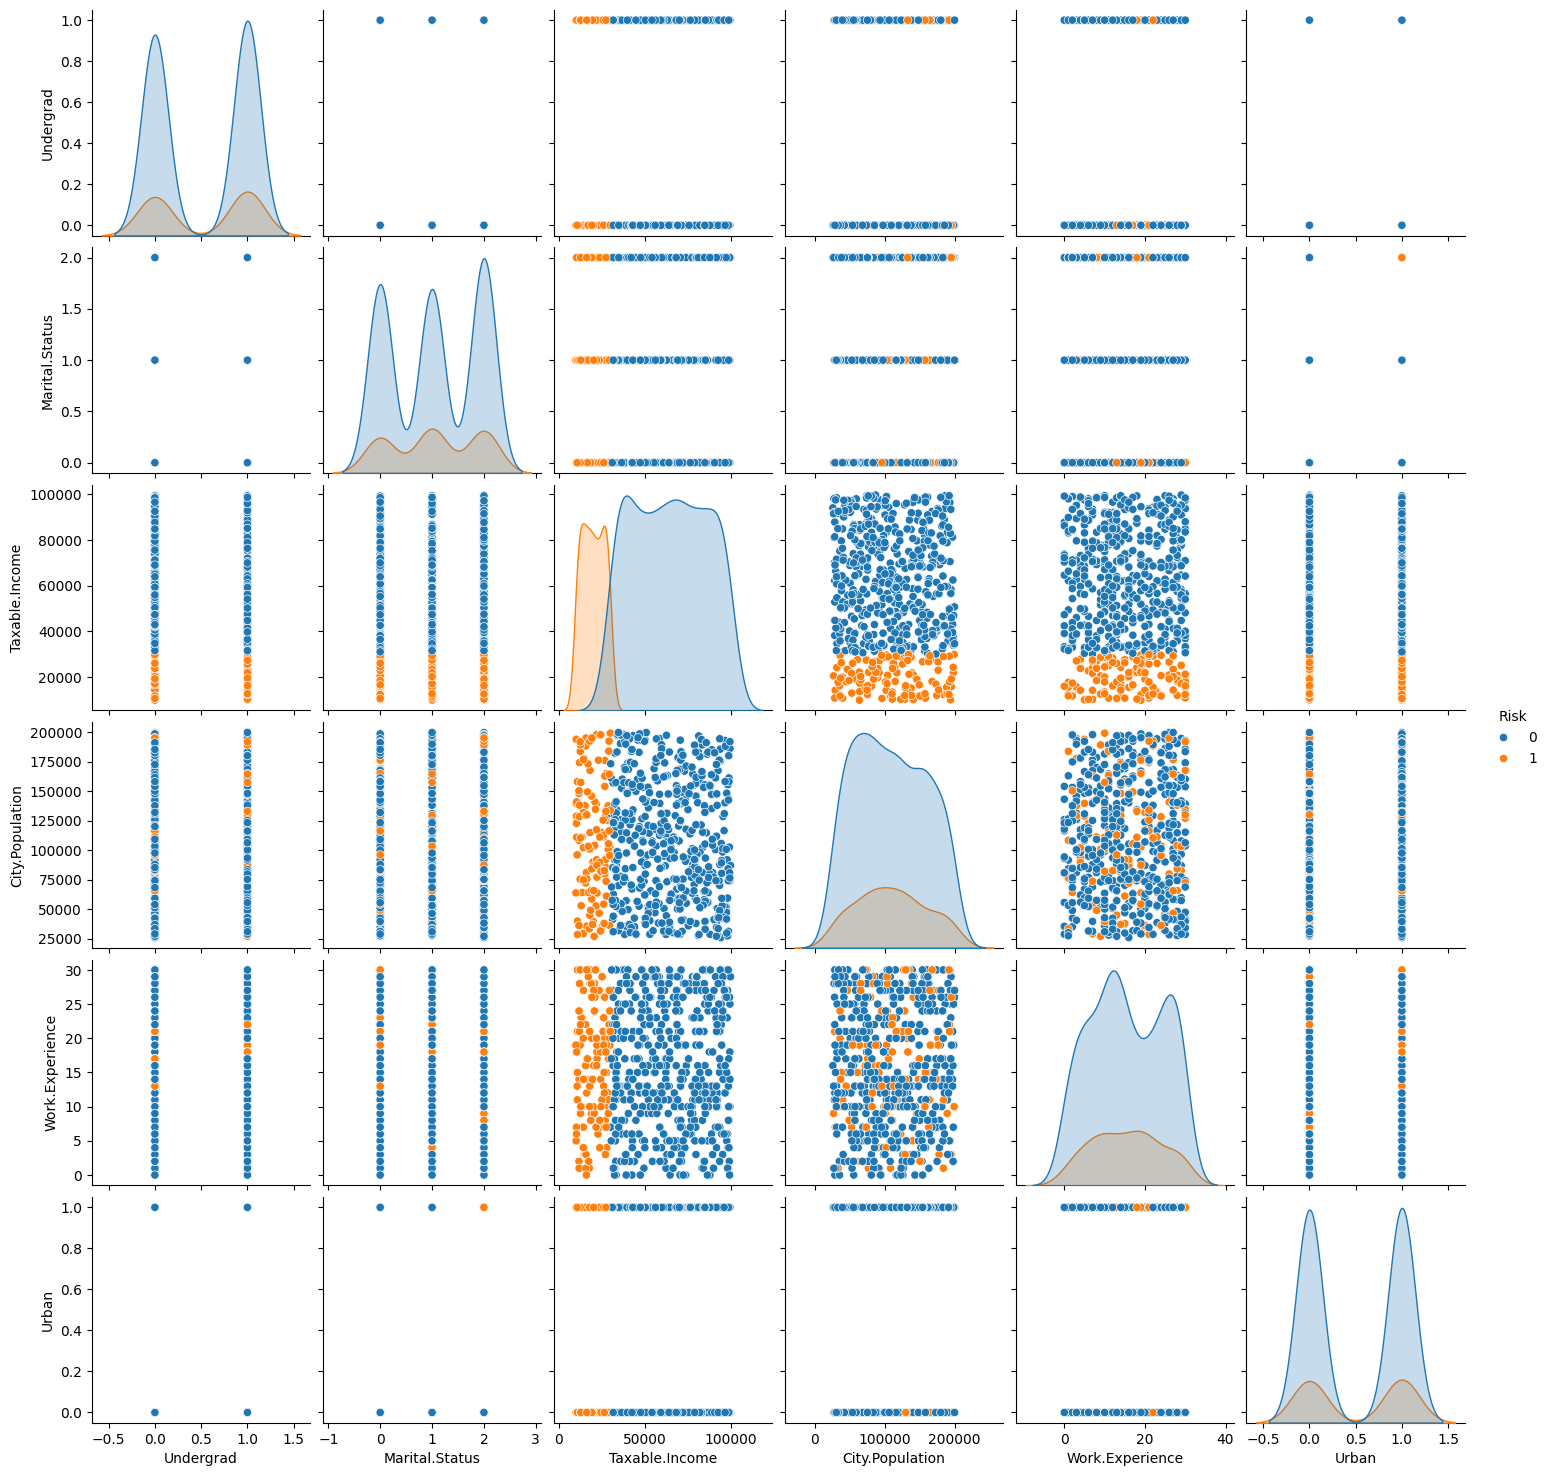

In [8]:
import seaborn as sns
#visualization
sns.pairplot(df, hue='Risk')

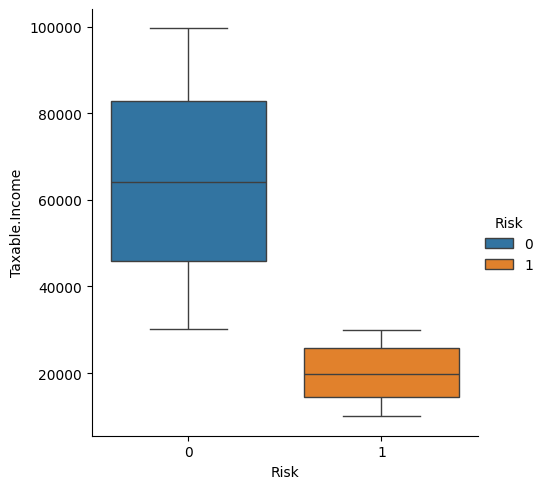

In [9]:
sns.catplot(data=df, x='Risk', y='Taxable.Income', kind='box', hue='Risk')

In [10]:
from sklearn.model_selection import train_test_split

#Build model

#train_test_split

X=df.iloc[:,:-1]
y=df['Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier

#use default parameters
#randomforest classifier

rfc = RandomForestClassifier(max_features=None, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=None, random_state=42)

In [22]:
y_pred = rfc.predict(X_test)

In [23]:
#Evaluation

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00        37

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [25]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[143   0]
 [  0  37]]


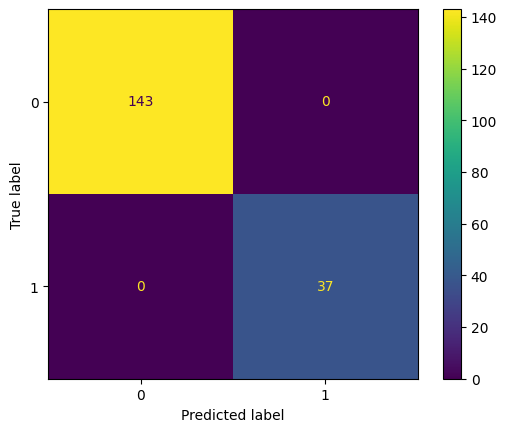

In [26]:
import matplotlib.pyplot as plt

cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
cmd.plot()
plt.show()

In [27]:
rfc.feature_importances_

array([0., 0., 1., 0., 0., 0.])

In [28]:
pd.DataFrame(index=X.columns,data=rfc.feature_importances_,columns=['Feature Importance']) 
#Only tax_income matters since our tree is based on it. 

,Feature Importance
Undergrad,0.0
Marital.Status,0.0
Taxable.Income,1.0
City.Population,0.0
Work.Experience,0.0
Urban,0.0


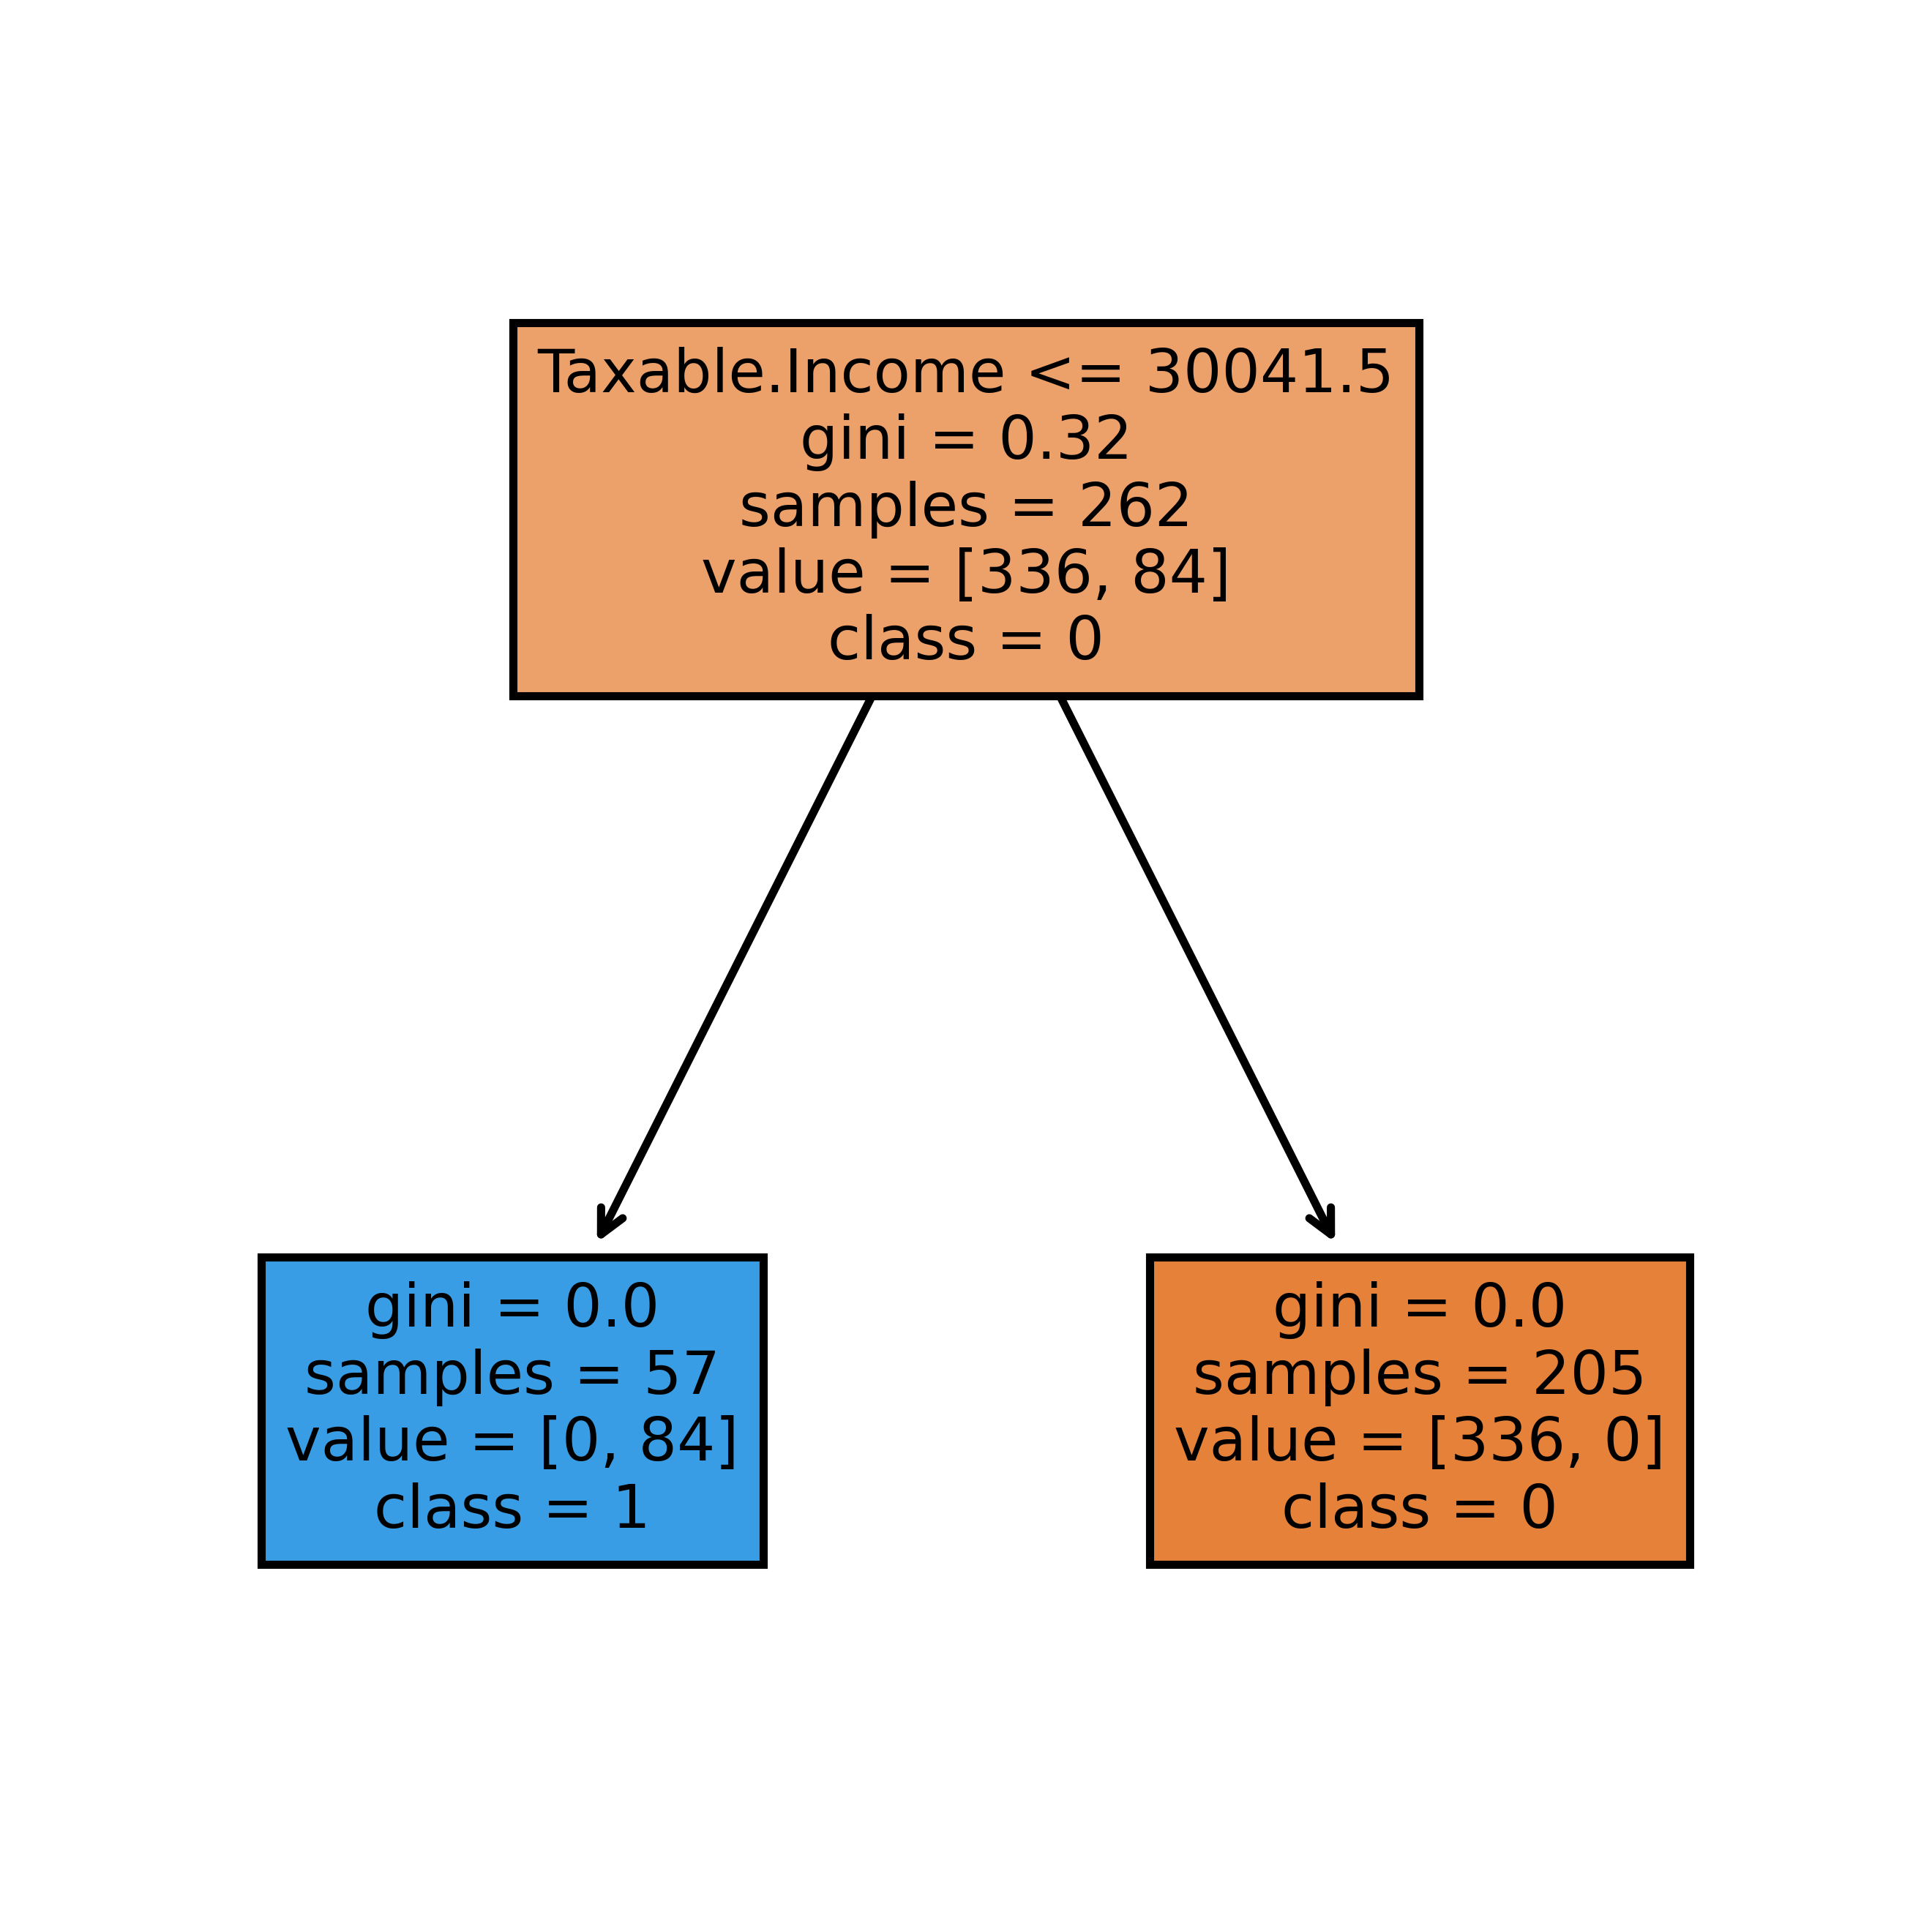

In [29]:
#visualize tree estimators

#visualization of a single tree estimator

from sklearn import tree

fn=df.columns.values[:-1]
#cn=df.columns.values[-1]
cn = df['Risk'].unique().astype(str)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rfc.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

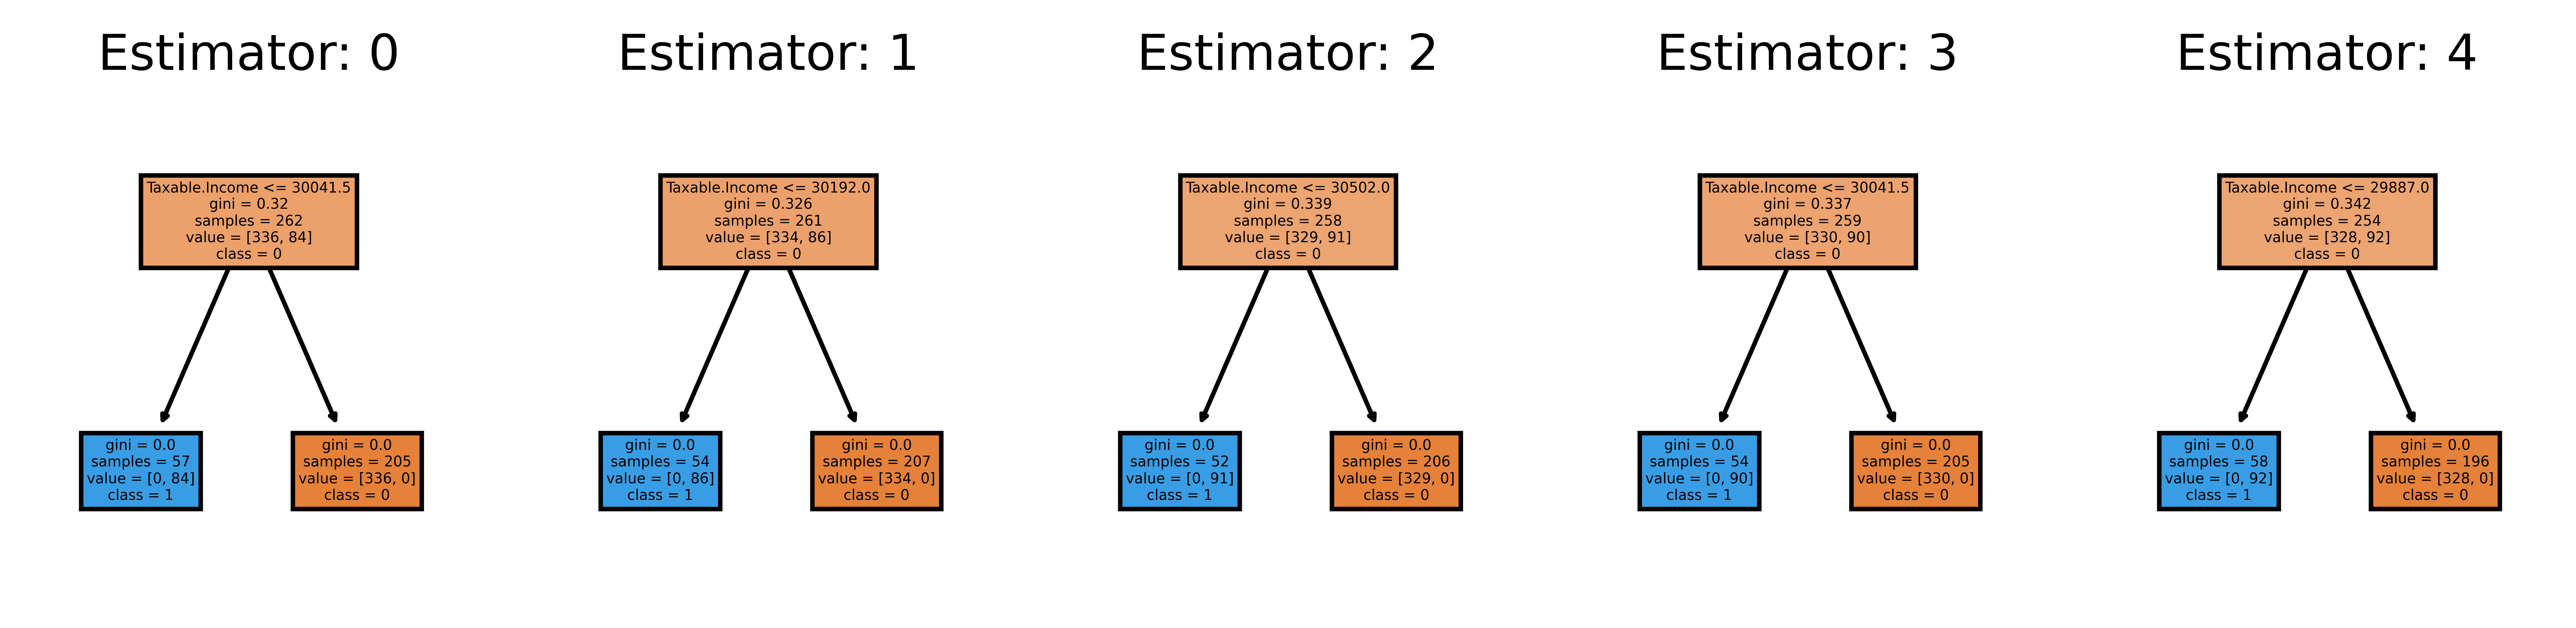

In [31]:
#visualization of multiple tress used as estimators

fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900) 
for index in range(0, 5):
    tree.plot_tree(rfc.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

In [45]:
#use gridsearchcv

In [32]:
#gridsearchcv

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = rfc,
                           param_grid = {'criterion':['entropy','gini'],
                                         'max_depth':[2,3,4,5]},
                           cv=5)
grid_search.fit(X,y)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 2}
0.9983333333333334


In [34]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=2, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, random_state=42)

In [36]:
y_pred = rfc.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0])

In [38]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[143,   0],
       [  1,  36]], dtype=int64)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       143
           1       1.00      0.97      0.99        37

    accuracy                           0.99       180
   macro avg       1.00      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



In [41]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9944444444444445